In [2]:
import numpy as np
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt 

df = pd.read_csv("TitanicData.csv")

In [ ]:
df.replace('?',np.nan, inplace=True) #Converting ? to NaN so that colums can be converted to floats

In [6]:
df = df.astype( {'age': np.float64, 'fare': np.float64} )
df.dtypes

pclass         int64
survived       int64
name          object
sex           object
age          float64
sibsp          int64
parch          int64
ticket        object
fare         float64
cabin         object
embarked      object
boat          object
body          object
home.dest     object
dtype: object

<AxesSubplot:xlabel='survived', ylabel='fare'>

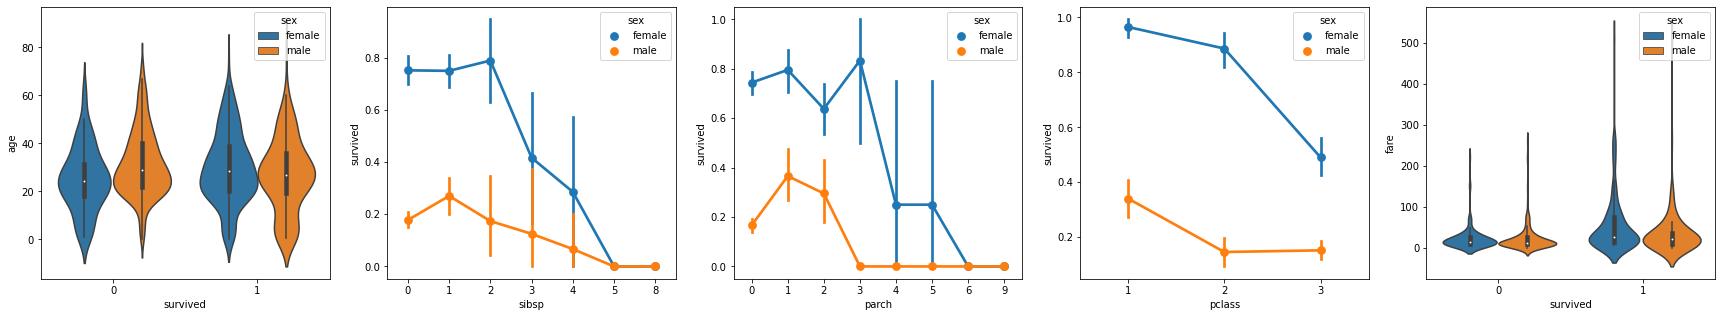

In [7]:
fig, axs = plt.subplots(ncols=5, figsize=(30,5))
sns.violinplot(x="survived", y="age", hue="sex", data=df, ax=axs[0])
sns.pointplot(x="sibsp", y="survived", hue="sex", data=df, ax=axs[1])
sns.pointplot(x="parch", y="survived", hue="sex", data=df, ax=axs[2])
sns.pointplot(x="pclass", y="survived", hue="sex", data=df, ax=axs[3])
sns.violinplot(x="survived", y="fare", hue="sex", data=df, ax=axs[4])

In [57]:
df.replace({'male':1, 'female':0}, inplace=True)

In [58]:
df.corr().abs()[['survived']]

,survived
pclass,0.312469
survived,1.000000
sex,0.528693
age,0.055513
sibsp,0.027825
parch,0.082660
fare,0.244265


In [59]:
df['relatives']= df.apply(lambda row: (row['sibsp']+row['parch']) > 0,axis=1)

In [60]:
df.corr().abs()[['survived']]

,survived
pclass,0.312469
survived,1.000000
sex,0.528693
age,0.055513
sibsp,0.027825
parch,0.082660
fare,0.244265
relatives,0.201719


In [61]:
df = df[['sex','pclass','age','relatives','fare','survived']].dropna()

# Training Models using Scikit Learn

Split the data into training and testing data.
Normalise the data

In [62]:
from sklearn.model_selection import train_test_split

In [63]:
x_train, x_test, y_train, y_test = train_test_split(df[['sex','pclass','age','relatives','fare']], df.survived, test_size=0.2, random_state=0)

In [64]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(x_train)
X_test = sc.transform(x_test)

### Apply Naive Bayes to the training data to train the model

In [65]:
from sklearn.naive_bayes import GaussianNB
model = GaussianNB()
model.fit(X_train, y_train)

GaussianNB()

### Test the Accuracy of the Model against Test Data

In [66]:
from sklearn import metrics
predict_test = model.predict(X_test)
print(metrics.accuracy_score(y_test, predict_test))

0.7464114832535885


# Neural Network with Keras

In [8]:
from keras.models import Sequential
from keras.layers import Dense

model = Sequential()

ModuleNotFoundError: No module named 'keras'